Changes:

1) First we have to add the image normalization using imageaug function of keras.

2) Add Relu after BN

3) Add Regularization

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


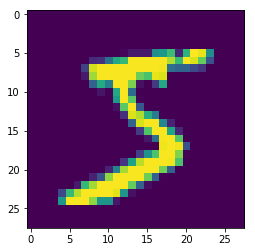

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
#from keras import backend as K
#K.set_image_dim_ordering('th')

### Image Normalization

In [0]:

train_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
training_set= train_gen.flow(X_train, Y_train, batch_size=64)
test_set= test_gen.flow(X_test, Y_test, batch_size=64)


In [0]:
from keras.optimizers import Adam
adam = Adam(lr=0.0015)

### Call backs for learning rate scheduling and saving best models

In [0]:
from keras.callbacks import LearningRateScheduler,ModelCheckpoint
import math

def step_decay(epoch):
   initial_lrate = 0.001
   drop = 0.05
   epochs_drop = 20.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate
lrate = LearningRateScheduler(step_decay)

#Callback to save best model
#The file is overwrited each time model validation accuracy increases
checkpoint = ModelCheckpoint('best_model.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='auto')  

# Call back list incluede learning rate and model checkpoint 
callbacks_list = [lrate,checkpoint]



### Network architecture

In [12]:
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras import regularizers

model = Sequential() 
#Receptive field becomes: 3X3
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1),kernel_regularizer=regularizers.l2(0.01))) #26X26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3,kernel_regularizer=regularizers.l2(0.01)))#24X24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3,kernel_regularizer=regularizers.l2(0.01))) #22X22
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))#11X11


model.add(Convolution2D(16, 3, 3,kernel_regularizer=regularizers.l2(0.01))) #9X9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1,kernel_regularizer=regularizers.l2(0.01)))#9X9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Convolution2D(10, 3, 3,kernel_regularizer=regularizers.l2(0.01)))#7X7
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.01)))#5X5




model.add(Convolution2D(10,5))


model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

W0620 18:37:13.300227 139657983870848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
W0620 18:37:13.305418 139657983870848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 18:37:13.308895 139657983870848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0620 18:37:13.339224 139657983870848 deprecation_

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 16)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`


In [13]:
model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])

W0620 18:37:26.276018 139657983870848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [14]:
model.fit_generator(training_set, 
                         steps_per_epoch=60000//64, 
                         validation_data= test_set, 
                         validation_steps=10000//64, 
                         epochs=40,verbose=1,callbacks=callbacks_list)

W0620 18:37:28.697663 139657983870848 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


937/937 [==============================] - 16s 17ms/step - loss: 0.7077 - acc: 0.8940 - val_loss: 0.4101 - val_acc: 0.9335

Epoch 00001: val_acc improved from -inf to 0.93349, saving model to best_model.h5
Epoch 2/40
937/937 [==============================] - 13s 14ms/step - loss: 0.1991 - acc: 0.9705 - val_loss: 0.2169 - val_acc: 0.9553

Epoch 00002: val_acc improved from 0.93349 to 0.95531, saving model to best_model.h5
Epoch 3/40
937/937 [==============================] - 13s 14ms/step - loss: 0.1499 - acc: 0.9738 - val_loss: 0.1306 - val_acc: 0.9774

Epoch 00003: val_acc improved from 0.95531 to 0.97736, saving model to best_model.h5
Epoch 4/40
937/937 [==============================] - 13s 14ms/step - loss: 0.1340 - acc: 0.9757 - val_loss: 0.1186 - val_acc: 0.9788

Epoch 00004: val_acc improved from 0.97736 to 0.97876, saving model to best_model.h5
Epoch 5/40
937/937 [==============================] - 13s 14ms/step - loss: 0.1267 - acc: 0.9758 - val_loss: 0.1166 - val_acc: 0.9776


Saved File

In [45]:
!ls

best_model.h5  sample_data


Observation:

1) First we added the image normalization using imageaug function of keras. Which helps to standerdise the images

2) Added Relu after BN 

3) Added Regularization: Regularization helped decrease the difference between training and validation accuracy

In [0]:
y_pred = model.evaluate_generator() (X_test)

In [0]:
#Get index of maximum value
y_pred = np.argmax(y_pred,axis=1)

In [0]:

non_correct_pred_indexes = [i for i in range(0,len(y_test)) if y_test[i] != y_pred[i]]

### Top 25 misclassified images

In [30]:
import pandas as pd
actual_vs_predicted = pd.DataFrame(columns = ['actual','predicted'])


actual_vs_predicted['actual'] = y_test[non_correct_pred_indexes[0:25]]
actual_vs_predicted['predicted'] = y_pred[non_correct_pred_indexes[0:25]]
actual_vs_predicted

,actual,predicted
0,9,4
1,6,0
2,9,8
3,2,7
4,2,6
5,5,3
6,2,1
7,6,0
8,3,5
9,2,8


In [0]:
images = X_test[non_correct_pred_indexes]

In [0]:
images = images[0:25]

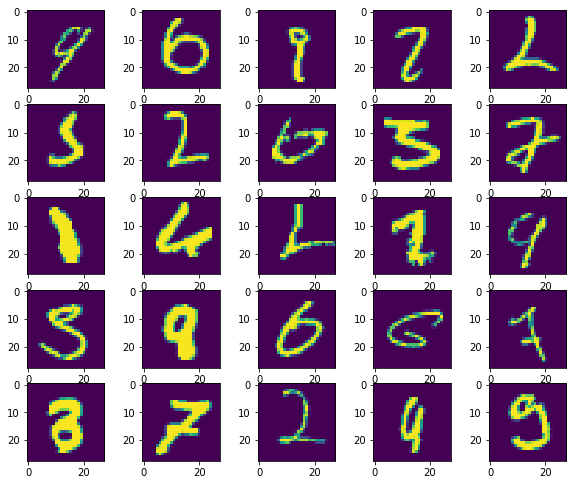

In [24]:
plt.figure(figsize=(10,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)